## Accleration from motion
Calcualtion of 6 DOF acceleration in some point based on 6 DOF motion in some other point

In [1]:
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import sympy.physics.mechanics as me
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from signal_lab.substitute_dynamic_symbols import substitute_dynamic_symbols, find_name, find_derivative_name, lambdify, find_derivatives


In [3]:
x0,y0,z0 = me.dynamicsymbols('x0 y0 z0')
x01d,y01d,z01d = me.dynamicsymbols('x0 y0 z0',1)
x02d,y02d,z02d = me.dynamicsymbols('x0 y0 z0',2)

phi,theta,psi = me.dynamicsymbols('phi theta psi')
p,q,r = me.dynamicsymbols('phi theta psi',1)
p1d,q1d,r1d = me.dynamicsymbols('phi theta psi',2)


p_x = sp.Symbol('p_x')
p_y = sp.Symbol('p_y')
p_z = sp.Symbol('p_z')



In [4]:
x02d

Derivative(x0(t), (t, 2))

In [5]:
N = me.ReferenceFrame('N')

In [6]:
#S = N.orientnew('S', 'Body', [phi,theta,psi],'321')
#M = N.orientnew('M','Axis', [psi,N.z])

S = N.orientnew('S', 'Body', [psi,theta,phi],'ZYX')


In [7]:
#S.set_ang_vel(N, q * N.y)
#S.set_ang_acc(N, q1d * N.y)

In [8]:
S.ang_vel_in(N)

(-sin(theta)*psi' + phi')*S.x + (sin(phi)*cos(theta)*psi' + cos(phi)*theta')*S.y + (-sin(phi)*theta' + cos(phi)*cos(theta)*psi')*S.z

In [9]:
S.ang_acc_in(N)

(-sin(theta)*psi'' - cos(theta)*psi'*theta' + phi'')*S.x + (-sin(phi)*sin(theta)*psi'*theta' + sin(phi)*cos(theta)*psi'' - sin(phi)*phi'*theta' + cos(phi)*cos(theta)*phi'*psi' + cos(phi)*theta'')*S.y + (-sin(phi)*cos(theta)*phi'*psi' - sin(phi)*theta'' - sin(theta)*cos(phi)*psi'*theta' + cos(phi)*cos(theta)*psi'' - cos(phi)*phi'*theta')*S.z

In [10]:
M = me.Point('M')  # Origo of measurement system
M.set_vel(N, 0)

O = M.locatenew('O', x0*N.x + y0*N.y + z0*N.z) # Origo of ship
O.set_vel(N, x01d*N.x + y01d*N.y + z01d*N.z)
O.set_acc(N, x02d*N.x + y02d*N.y + z02d*N.z)



In [11]:
P = O.locatenew('P', p_x*S.x + p_y*S.y + p_z*S.z)
P.set_vel(S, 0)


In [12]:
S.dcm(N)

Matrix([
[                                      cos(psi(t))*cos(theta(t)),                                        sin(psi(t))*cos(theta(t)),            -sin(theta(t))],
[sin(phi(t))*sin(theta(t))*cos(psi(t)) - sin(psi(t))*cos(phi(t)),  sin(phi(t))*sin(psi(t))*sin(theta(t)) + cos(phi(t))*cos(psi(t)), sin(phi(t))*cos(theta(t))],
[sin(phi(t))*sin(psi(t)) + sin(theta(t))*cos(phi(t))*cos(psi(t)), -sin(phi(t))*cos(psi(t)) + sin(psi(t))*sin(theta(t))*cos(phi(t)), cos(phi(t))*cos(theta(t))]])

In [13]:
vector = P.pos_from(M)
motion_P = vector.express(N)
motion_P

(p_x*cos(psi)*cos(theta) + p_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + p_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi)) + x0)*N.x + (p_x*sin(psi)*cos(theta) + p_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) + p_z*(-sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi)) + y0)*N.y + (-p_x*sin(theta) + p_y*sin(phi)*cos(theta) + p_z*cos(phi)*cos(theta) + z0)*N.z

In [14]:
motion_matrix = vector.to_matrix(N)
motion_matrix

Matrix([
[ p_x*cos(psi(t))*cos(theta(t)) + p_y*(sin(phi(t))*sin(theta(t))*cos(psi(t)) - sin(psi(t))*cos(phi(t))) + p_z*(sin(phi(t))*sin(psi(t)) + sin(theta(t))*cos(phi(t))*cos(psi(t))) + x0(t)],
[p_x*sin(psi(t))*cos(theta(t)) + p_y*(sin(phi(t))*sin(psi(t))*sin(theta(t)) + cos(phi(t))*cos(psi(t))) + p_z*(-sin(phi(t))*cos(psi(t)) + sin(psi(t))*sin(theta(t))*cos(phi(t))) + y0(t)],
[                                                                                            -p_x*sin(theta(t)) + p_y*sin(phi(t))*cos(theta(t)) + p_z*cos(phi(t))*cos(theta(t)) + z0(t)]])

In [15]:
motion_lambda = lambdify(motion_matrix)

In [16]:
motion_lambda

<function _lambdifygenerated(p_x, p_y, p_z, phi, psi, theta, x0, y0, z0)>

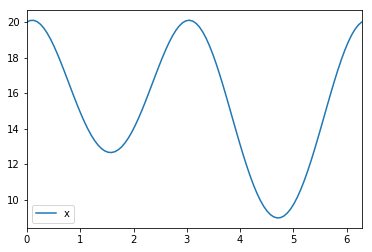

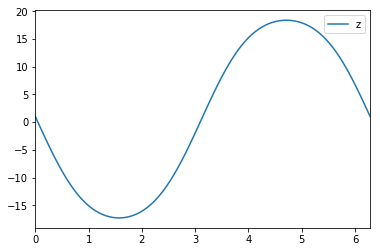

In [17]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
df = pd.DataFrame(index = t)
df['phi'] = 0
df['theta'] = np.sin(t)
df['psi'] = 0

df['p_x'] = 20
df['p_y'] = 0
df['p_z'] = 1

df['x0'] = np.sin(t)
df['y0'] = np.sin(t)
df['z0'] = -np.sin(t)
motions = motion_lambda(**df)

df_result = df.copy()
df_result['x'] = motions[0][0]
df_result['y'] = motions[1][0]
df_result['z'] = motions[2][0]

fig,ax=plt.subplots()
df_result.plot(y='x', ax=ax)

fig,ax=plt.subplots()
df_result.plot(y='z', ax=ax)


## Velocity

In [18]:
P.v2pt_theory(O,N,S)

x0'*N.x + y0'*N.y + z0'*N.z + (-p_y*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') + p_z*(sin(phi)*cos(theta)*psi' + cos(phi)*theta'))*S.x + (p_x*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') - p_z*(-sin(theta)*psi' + phi'))*S.y + (-p_x*(sin(phi)*cos(theta)*psi' + cos(phi)*theta') + p_y*(-sin(theta)*psi' + phi'))*S.z

In [19]:
velocity_matrix = P.vel(N).express(N).to_matrix(N)
velocity_matrix

Matrix([
[ (p_x*(-sin(phi(t))*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), t)) - p_z*(-sin(theta(t))*Derivative(psi(t), t) + Derivative(phi(t), t)))*(sin(phi(t))*sin(theta(t))*cos(psi(t)) - sin(psi(t))*cos(phi(t))) + (-p_x*(sin(phi(t))*cos(theta(t))*Derivative(psi(t), t) + cos(phi(t))*Derivative(theta(t), t)) + p_y*(-sin(theta(t))*Derivative(psi(t), t) + Derivative(phi(t), t)))*(sin(phi(t))*sin(psi(t)) + sin(theta(t))*cos(phi(t))*cos(psi(t))) + (-p_y*(-sin(phi(t))*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), t)) + p_z*(sin(phi(t))*cos(theta(t))*Derivative(psi(t), t) + cos(phi(t))*Derivative(theta(t), t)))*cos(psi(t))*cos(theta(t)) + Derivative(x0(t), t)],
[(p_x*(-sin(phi(t))*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), t)) - p_z*(-sin(theta(t))*Derivative(psi(t), t) + Derivative(phi(t), t)))*(sin(phi(t))*sin(psi(t))*sin(theta(t)) + cos(phi(t))*cos(psi(t))) + (-p_x*(sin(phi(t))*cos(theta(t))*Derivative(psi(t),

In [20]:
velocity_lambda = lambdify(velocity_matrix)

In [21]:
velocity_lambda

<function _lambdifygenerated(p_x, p_y, p_z, phi, phi1d, psi, psi1d, theta, theta1d, x01d, y01d, z01d)>

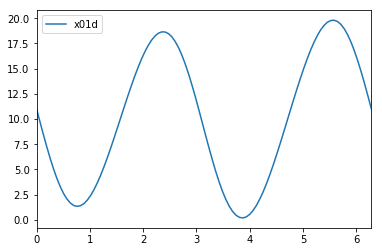

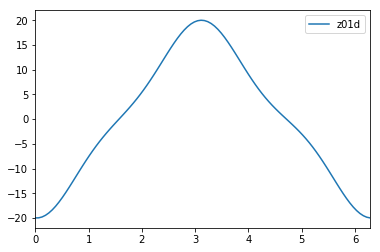

In [22]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
df = pd.DataFrame(index = t)
df['phi'] = 0
df['theta'] = np.sin(t)
df['psi'] = 0

df['phi1d'] = 0
df['theta1d'] = np.cos(t)
df['psi1d'] = 0

df['p_x'] = 20
df['p_y'] = 0
df['p_z'] = 1

df['x01d'] = 10
df['y01d'] = 0
df['z01d'] = 0


velocities = velocity_lambda(**df)

df_result = df.copy()
df_result['x01d'] = velocities[0][0]
df_result['y01d'] = velocities[1][0]
df_result['z01d'] = velocities[2][0]

fig,ax=plt.subplots()
df_result.plot(y='x01d', ax=ax)

fig,ax=plt.subplots()
df_result.plot(y='z01d', ax=ax)

## Acceleration

In [23]:
P.a2pt_theory(O,N,S)

x0''*N.x + y0''*N.y + z0''*N.z + (-p_y*(-sin(phi)*cos(theta)*phi'*psi' - sin(phi)*theta'' - sin(theta)*cos(phi)*psi'*theta' + cos(phi)*cos(theta)*psi'' - cos(phi)*phi'*theta') + p_z*(-sin(phi)*sin(theta)*psi'*theta' + sin(phi)*cos(theta)*psi'' - sin(phi)*phi'*theta' + cos(phi)*cos(theta)*phi'*psi' + cos(phi)*theta'') - (p_x*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') - p_z*(-sin(theta)*psi' + phi'))*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') + (-p_x*(sin(phi)*cos(theta)*psi' + cos(phi)*theta') + p_y*(-sin(theta)*psi' + phi'))*(sin(phi)*cos(theta)*psi' + cos(phi)*theta'))*S.x + (p_x*(-sin(phi)*cos(theta)*phi'*psi' - sin(phi)*theta'' - sin(theta)*cos(phi)*psi'*theta' + cos(phi)*cos(theta)*psi'' - cos(phi)*phi'*theta') - p_z*(-sin(theta)*psi'' - cos(theta)*psi'*theta' + phi'') - (-p_x*(sin(phi)*cos(theta)*psi' + cos(phi)*theta') + p_y*(-sin(theta)*psi' + phi'))*(-sin(theta)*psi' + phi') + (-p_y*(-sin(phi)*theta' + cos(phi)*cos(theta)*psi') + p_z*(sin(phi)*cos(theta)*psi' + cos(phi)*t

### Acceleration in earth fixed reference frame N expressed in ship Reference frame S

In [24]:
#acceleration_matrix = P.acc(N).express(N).to_matrix(N)
acceleration_matrix = P.acc(N).express(S).to_matrix(S)

acceleration_matrix

Matrix([
[-p_y*(-sin(phi(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(psi(t), t) - sin(phi(t))*Derivative(theta(t), (t, 2)) - sin(theta(t))*cos(phi(t))*Derivative(psi(t), t)*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), (t, 2)) - cos(phi(t))*Derivative(phi(t), t)*Derivative(theta(t), t)) + p_z*(-sin(phi(t))*sin(theta(t))*Derivative(psi(t), t)*Derivative(theta(t), t) + sin(phi(t))*cos(theta(t))*Derivative(psi(t), (t, 2)) - sin(phi(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(psi(t), t) + cos(phi(t))*Derivative(theta(t), (t, 2))) - (p_x*(-sin(phi(t))*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), t)) - p_z*(-sin(theta(t))*Derivative(psi(t), t) + Derivative(phi(t), t)))*(-sin(phi(t))*Derivative(theta(t), t) + cos(phi(t))*cos(theta(t))*Derivative(psi(t), t)) + (-p_x*(sin(phi(t))*cos(theta(t))*Derivative(psi(t), t) + cos(phi(t))*Derivative(theta(t), t)) + p_y*(-sin(theta(

In [25]:
substitute_dynamic_symbols(acceleration_matrix)

Matrix([
[-p_y*(-phi1d*psi1d*sin(phi)*cos(theta) - phi1d*theta1d*cos(phi) - psi1d*theta1d*sin(theta)*cos(phi) + psi2d*cos(phi)*cos(theta) - theta2d*sin(phi)) + p_z*(phi1d*psi1d*cos(phi)*cos(theta) - phi1d*theta1d*sin(phi) - psi1d*theta1d*sin(phi)*sin(theta) + psi2d*sin(phi)*cos(theta) + theta2d*cos(phi)) + x02d*cos(psi)*cos(theta) + y02d*sin(psi)*cos(theta) - z02d*sin(theta) + (-p_x*(psi1d*sin(phi)*cos(theta) + theta1d*cos(phi)) + p_y*(phi1d - psi1d*sin(theta)))*(psi1d*sin(phi)*cos(theta) + theta1d*cos(phi)) - (p_x*(psi1d*cos(phi)*cos(theta) - theta1d*sin(phi)) - p_z*(phi1d - psi1d*sin(theta)))*(psi1d*cos(phi)*cos(theta) - theta1d*sin(phi))],
[                 p_x*(-phi1d*psi1d*sin(phi)*cos(theta) - phi1d*theta1d*cos(phi) - psi1d*theta1d*sin(theta)*cos(phi) + psi2d*cos(phi)*cos(theta) - theta2d*sin(phi)) - p_z*(phi2d - psi1d*theta1d*cos(theta) - psi2d*sin(theta)) + x02d*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + y02d*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) + z02d*s

In [26]:
acceleration_lambda = lambdify(acceleration_matrix)

In [27]:
acceleration_lambda

<function _lambdifygenerated(p_x, p_y, p_z, phi, phi1d, phi2d, psi, psi1d, psi2d, theta, theta1d, theta2d, x02d, y02d, z02d)>

### Centrifugal acceleration
Absolute acceleration can be calcualted as: <br>
$ |a| = r\cdot\dot{\theta}^2 $

With the components: <br>
$ \ddot{x_0} = -a $ <br>
$ \ddot{z_0} = 0 $


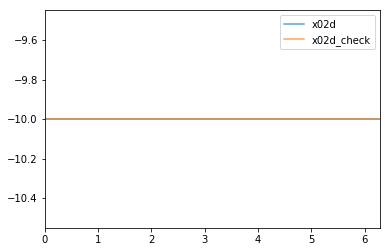

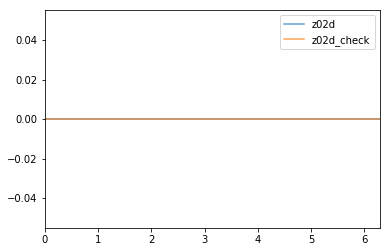

In [28]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
r_ = 10
w_ = 1
df = pd.DataFrame(index = t)

df['phi'] = 0
df['theta'] = w_*t
df['psi'] = 0

df['phi1d'] = 0
df['theta1d'] = w_
df['psi1d'] = 0

df['phi2d'] = 0
df['theta2d'] = 0
df['psi2d'] = 0

df['p_x'] = r_
df['p_y'] = 0
df['p_z'] = 0


df['x02d'] = 0
df['y02d'] = 0
df['z02d'] = 0


accelerations = acceleration_lambda(**df)

df_result = df.copy()
df_result['x02d'] = accelerations[0,0]
df_result['y02d'] = accelerations[1,0]
df_result['z02d'] = accelerations[2,0]

a = r_* w_**2
df_result['x02d_check'] = -a
df_result['z02d_check'] = 0

fig,ax=plt.subplots()
df_result.plot(y=['x02d','x02d_check'], ax=ax, alpha=0.7)

fig,ax=plt.subplots()
df_result.plot(y=['z02d','z02d_check'], ax=ax, alpha=0.7)

## Save lambdas

In [29]:
import dill
import signal_lab
dill.settings['recurse'] = True

In [30]:
import os.path
with open(os.path.join(signal_lab.directory,'point_acceleration.dill'),mode='wb') as file:
    dill.dump(acceleration_lambda, file=file)